### Exercício

Calcule a variância, a amplitude, o desvio padrão e a amplitude interquartil das features do dataset state.csv.

Dicas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html

In [1]:
import pandas as pd
from scipy import stats

In [2]:
import os
path = os.getcwd()

In [3]:
#Leitura do arquivo
df = pd.read_csv(path + r'\state.csv')
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [6]:
# Variância

df.var(numeric_only=True)

Population     4.689833e+13
Murder.Rate    3.670045e+00
dtype: float64

In [7]:
# Desvio padrão
df.std(numeric_only=True)

Population     6.848235e+06
Murder.Rate    1.915736e+00
dtype: float64

In [19]:
# Quartis

quartis = df.quantile([0.25, 0.5, 0.75], numeric_only=True).T
quartis

,0.25,0.50,0.75
Population,1833004.250,4436369.5,6680312.25
Murder.Rate,2.425,4.0,5.55


In [27]:
# Amplitude

amplitude = df.max(numeric_only=True) - df.min(numeric_only=True)
amplitude

Population     36690330.0
Murder.Rate           9.4
dtype: float64

In [23]:
# Amplitude Interquartil

iqr = quartis[0.75] - quartis[0.25]
iqr

Population     4847308.000
Murder.Rate          3.125
dtype: float64

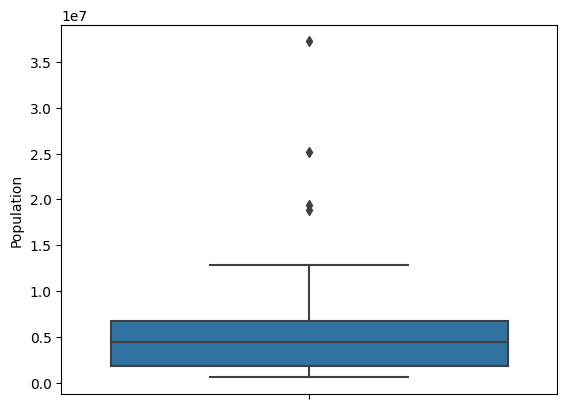

In [39]:
import seaborn as sns

sns.boxplot(data=df, y='Population');

In [53]:
df['Population'].value_counts(bins=10, sort=False, normalize=True)*100

(526935.669, 4232659.0]     48.0
(4232659.0, 7901692.0]      28.0
(7901692.0, 11570725.0]     12.0
(11570725.0, 15239758.0]     4.0
(15239758.0, 18908791.0]     2.0
(18908791.0, 22577824.0]     2.0
(22577824.0, 26246857.0]     2.0
(26246857.0, 29915890.0]     0.0
(29915890.0, 33584923.0]     0.0
(33584923.0, 37253956.0]     2.0
Name: Population, dtype: float64

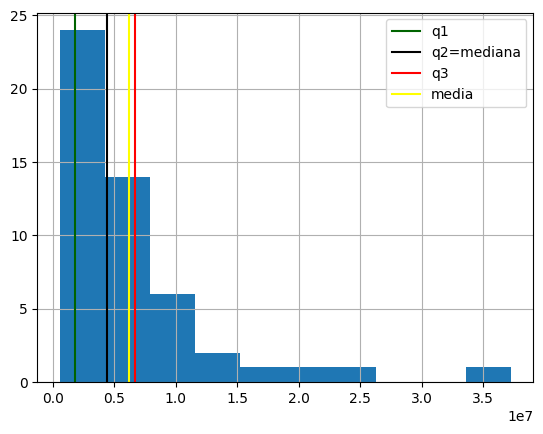

In [57]:
import matplotlib.pyplot as plt

#Calculo do q1, q2, q3 e média
q1 = df['Population'].quantile(0.25)
q2 = df['Population'].quantile(0.5)
q3 = df['Population'].quantile(0.75)
media = df['Population'].mean()

#Plot do histograma
df['Population'].hist(bins=10)

# plotando a mediana e os quartis
plt.axvline(q1,color="darkgreen", label="q1")
plt.axvline(q2, color="black", label="q2=mediana")
plt.axvline(q3, color="red", label="q3")
plt.axvline(media, color="yellow", label="media")
plt.legend()
plt.show()

In [59]:
df['Population'].skew(numeric_only=True)

2.6426346412748765